# Aprendizado supervisionado

## Alunos

- João Vitor Vendemiato Fatoretto - 199944
- Natan Beltrão da Cunha Pevidor Carvalho - 184972

## Resumo


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parte 1 - Tarefa de regressão
O objetivo da primeira parte do projeto é fazer uma previsão da trajetória de um chute ao gol em um jogo de futebol de robôs para verificar se o chute vai ou não se concretizar em um gol, dado que também há um robô goleiro defendendo. Usaremos dois datasets que representam dois chutes diferentes, os quais possuem 3 colunas, que representam os eixos x, y e z, e 20 linhas, sendo que cada uma representa uma fração de 1/60 de um segundo. A ideia é usar o algoritmo Gradient Descendant fazendo tanto uma regressão linear, quanto uma polinomial e comparar os dados obtidos entre si, considerando ambos os modelos e também os dois chutes diferentes.

Abaixo, plotamos os pontos de ambos os datasets em um gráfico 3D para facilitar a visualização dos dados e seu entendimento:

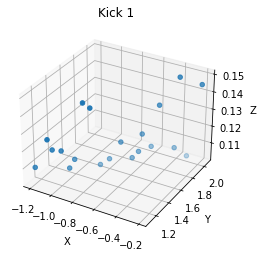

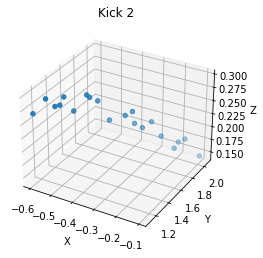

In [4]:
data_kick_1 = np.loadtxt('kick1.dat')
data_kick_2 = np.loadtxt('kick2.dat')

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_kick_1[:,0], data_kick_1[:,1], data_kick_1[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Kick 1')
plt.show()

ax = plt.axes(projection='3d')

ax.scatter(data_kick_2[:,0], data_kick_2[:,1], data_kick_2[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Kick 2')
plt.show()

## Gradient Descendant
A regressão linear e polinomia foram feitas, seguindo as instruções do projeto, com o algoritmo _Gradient Descendant_, o qual, dado uma função de custo definida, procura o ponto de mínimo da função por meio de uma valiação do seu gradiente. Como os movimentos no eixo X, Y e Z são independentes entre si, decidimos utilizar uma função de custo para cada eixo, a qual depende apenas de uma marcação de tempo T que incluímos - cada marcação representa uma fração de 1/60 segundos, como descrito no enunciado.

Sendo assim, para o caso linear, definimos as seguintes funções de custo:
- X = a1T + b1;
- Y = a2T + b2;
- Z = a3T + b3;

Já para o caso polinomial:
- X = a1T² + b1T + c1;
- Y = a2T² + b2T + c2;
- Z = a3T² + b3T + c3;

Para o caso polinomial, foi necessário inferir o grau do polinômio da função de custo. Com base tanto na distribuição dos dados no eixo Z, que parece uma parábola, quanto na física, já que no eixo Z atua apenas a aceleração constante da gravidade (descrevendo um movimento uniformemente variado, cujo gráfico característico é uma parábola), escolhemos um polinômio de grau 2.

Outra forma não abordada que poderíamos ter feito para a escolha do grau desse polinômio é criar uma função _Gradient Descendant_ diferente para cada grau de polinômio (ou uma que, de algum modo, funcionasse para todos os graus, calculando a derivada de cada um automaticamente) e, para cada grau, avaliar o quão bem o polinômio gerado descreve os dados de cada chute por meio da função _adjusted R²_, definida posteriormente nesse relatório. Optamos pela inferência do grau para não aumentar a complexidade do relatório e do trabalho de forma desnecessária, já que a inferência supriu bem para o caso deste relatório.

### Preparação dos Dados
Com o modelo escolhido, primeiro passo foi separar os dados de cada eixo em variáveis diferentes e criar um vetor de marcações de tempo, considerando que cada marcação tem a fração de 1/60 segundos, de modo que possamos trabalhar cada um dos eixos separadamente pelo algoritmo do Gradiente Descendant.

In [5]:
t = 1/60
T = np.array([t, t*2, t*3, t*4, t*5, t*6, t*7, t*8, t*9, t*10, t*11, t*12, t*13, t*14, t*15, t*16, t*17, t*18, t*19, t*20])

X1 = data_kick_1[:, 0]
Y1 = data_kick_1[:, 1]
Z1 = data_kick_1[:, 2]

X2 = data_kick_2[:, 0]
Y2 = data_kick_2[:, 1]
Z2 = data_kick_2[:, 2]

Separando os dados dessa forma, com suas respectivas marções de tempo, temos os seguintes gráficos para o chute 1:

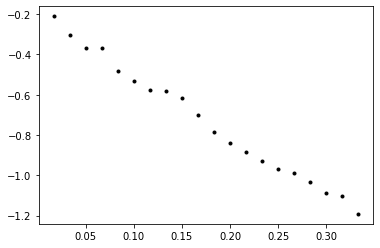

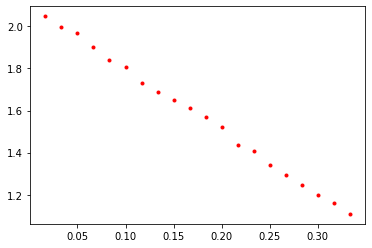

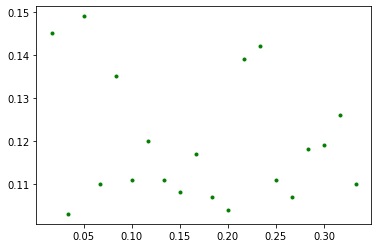

In [6]:
plt.plot(T, X1, '.', color='black')
plt.show()

plt.plot(T, Y1, '.', color='red')
plt.show()

plt.plot(T, Z1, '.', color='green')
plt.show()

E para o chute 2:

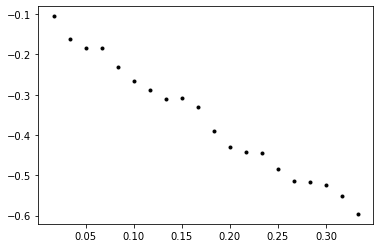

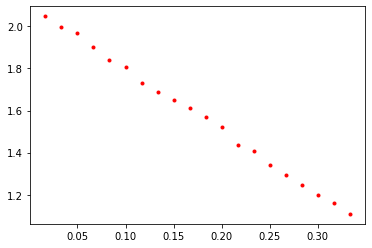

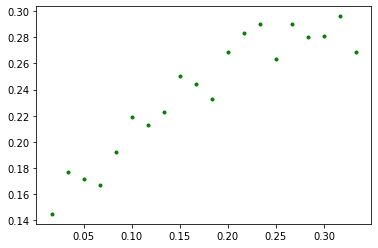

In [7]:
plt.plot(T, X2, '.', color='black')
plt.show()

plt.plot(T, Y2, '.', color='red')
plt.show()

plt.plot(T, Z2, '.', color='green')
plt.show()

### O algoritmo
Com o grau da função de custo para a regressão polinomial definida, optamos por criar duas funções para o algoritmo _Gradient Descendant_, sendo a primeira para a regressão linear e a segunda para a regressão polinomial. As funções foram projetadas para rodar para cada eixo de forma independente, como explicitado anteriormente, com as respectivas derivadas parciais para cada coeficiente em cada um dos casos na atualização dos passos. As funções recebem coeficientes iniciais a, b e c para começar o ajuste, uma learning rate L, o número de épocas epochs, um vetor W com as posições do eixo em questão e um vetor T com as marcações de tempo. Por fim, a função retornar os coeficientes da função resultante.

In [8]:
def gradientDescendantG1(a, b, L, epochs, W, T):
    n = float(len(W))
    
    for i in range(epochs):
        temp_a = (1/n) * sum((b + (a*T) - W) * T) # angular
        temp_b = (1/n) * sum(b + (a*T) - W) # linear
        a = a - (L * temp_a)
        b = b - (L * temp_b)
        
    return a, b

def gradientDescendantG2(a, b, c, L, epochs, W, T):
    n = float(len(W))
    
    for i in range(epochs):
        temp_a = (1/n) * sum((c + (b*T) + (a*(T**2)) - W) * (T**2)) # ax²
        temp_b = (1/n) * sum((c + (b*T) + (a*(T**2)) - W) * T) # bx
        temp_c = (1/n) * sum(c + (b*T) + (a*(T**2)) - W) # c
        a = a - (L * temp_a)
        b = b - (L * temp_b)
        c = c - (L * temp_c)
        
    return a, b, c

### Função de plot
As funções de plot, diferentes para o caso linear e polinomial, simplesmente plotam os pontos de um determinado eixo e a função resultante com os coeficientes dados pelo algoritmo _Gradient Descendant_.

In [9]:
def plotRegressionLineG1(a, b, W, T):
    pred_W = a*T + b
    plt.scatter(T, W) 
    plt.plot(T, pred_W, color='red')  # regression line
    plt.show()

def fG2(x, a, b, c):
    return a*x**2 + b*x + c
    
def plotRegressionLineG2(a, b, c, W, T):
    x_vals = np.linspace(-0, 0.4, 2000)
    y_vals = np.array([fG2(x, a, b, c) for x in x_vals])
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(x_vals, y_vals)
    
    plt.scatter(T, W)
    plt.show()

## Avaliando o "kick1"
Para o primeiro chute, analisando os gráficos, temos que os pontos dos eixos X e Y parecem ser bem descritos por ambas as funções encontradas, visto que mesmo as funções da regressão linear se aproximam muito de uma reta. Para o eixo Z, nenhuma das funções parece descrever os pontos muito bem, visto que eles são muito esparços.

Entretanto, podemos notar que a escala do gráfico e as variações nos pontos do eixo Z também são bem pequenas considerando o tamanho do gol e da bola, logo, poderíamos dizer que as variações não seriam tão relevantes para o nosso resultado final e, portanto, também poderíamos dizer que ambas as funções para o eixo Z descrevem de maneira satisfatória o modelo, apesar de não tão boa. De qualquer modo, comparando com o chute 2, pontos os quais são menos esparços mantendo a escala, vemos realmente que essas funções não descrevem tão bem o modelo quanto as do eixo Z no segundo chute.

-2.9731090562644886 -0.2074064920109118


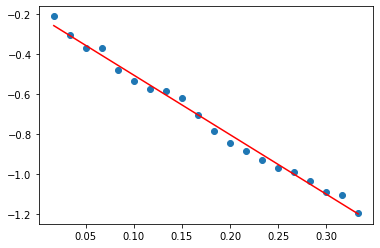

-2.992589870876151 2.1003525666662335


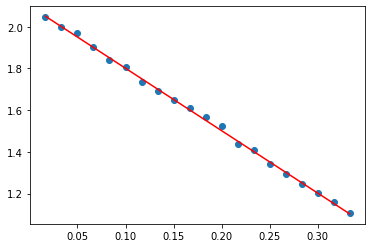

-0.029587575089450858 0.12477781549995737


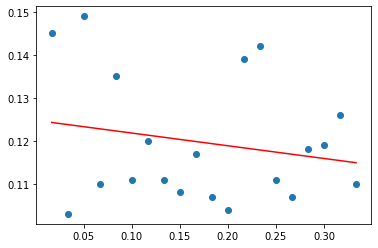

In [10]:
a1, b1 = gradientDescendantG1(0, 0, 0.1, 10000, X1, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X1, T)

a2, b2 = gradientDescendantG1(0, 0, 0.1, 10000, Y1, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y1, T)

a3, b3 = gradientDescendantG1(0, 0, 0.1, 10000, Z1, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z1, T)

X1_linear_coefficients = [(a1, b1)]
Y1_linear_coefficients = [(a2, b2)]
Z1_linear_coefficients = [(a3, b3)]

Escrever sobre a parte polinomial do chute 1

0.27037003113768476 -3.0647408397081057 -0.20214950358209152


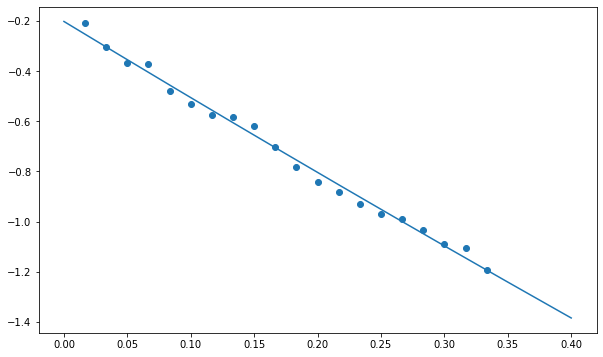

-0.5041712716695774 -2.815215271289814 2.089408746428297


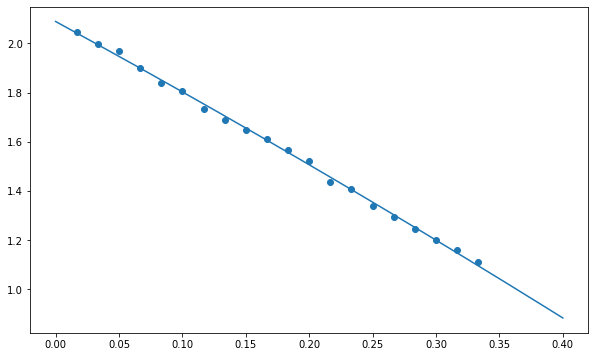

0.16585562011151417 -0.08714536395476803 0.1282389678302498


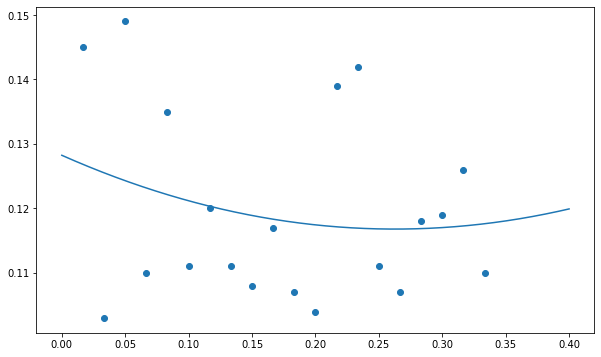

In [11]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 1, 10000, X1, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X1, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 1, 10000, Y1, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y1, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 1, 10000, Z1, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z1, T)

X1_polynomial_coefficients = [(a1, b1, c1)]
Y1_polynomial_coefficients = [(a2, b2, c2)]
Z1_polynomial_coefficients = [(a3, b3, c3)]

## Avaliando o "kick2"
Em uma análise visual, assim como no chute 1, as funções encontradas para os eixos X e Y parecem descrever bem o modelo. Já no caso do eixo Z, apesar da função gerada pela regressão linear não descrever tão mal os dados, a função gerada pela regressão polinomial de segundo grau descreve-os melhor - o que está de acordo com o modelo físico de movimento uniformemente variado no eixo Z.

-1.4718496293177934 -0.10562660034256531


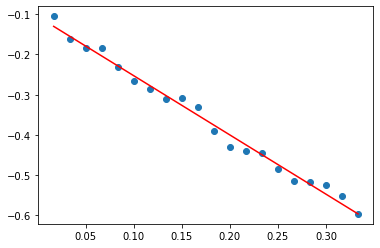

-2.992589870876151 2.1003525666662335


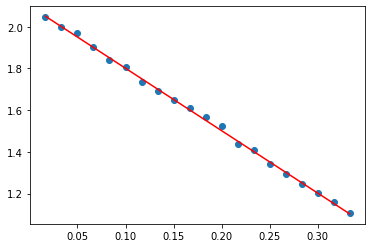

0.4439483848570019 0.16010911430741562


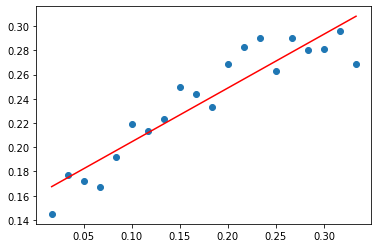

In [12]:
a1, b1 = gradientDescendantG1(0, 0, 0.1, 10000, X2, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X2, T)

a2, b2 = gradientDescendantG1(0, 0, 0.1, 10000, Y2, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y2, T)

a3, b3 = gradientDescendantG1(0, 0, 0.1, 10000, Z2, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z2, T)

X2_linear_coefficients = (a1, b1)
Y2_linear_coefficients = (a2, b2)
Z2_linear_coefficients = (a3, b3)

0.12295457746236045 -1.5134303486422294 -0.10325171863525705


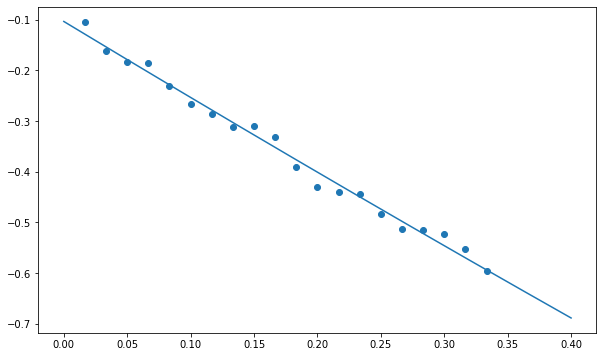

-0.5041712716695774 -2.815215271289814 2.089408746428297


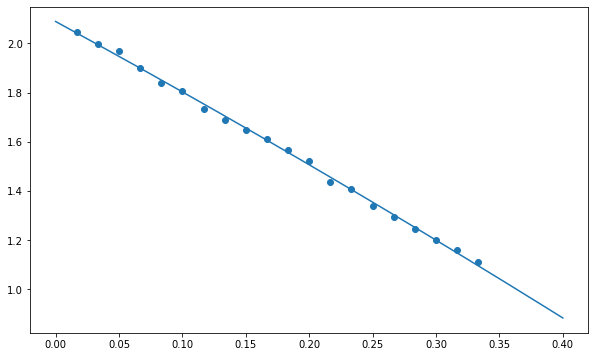

-0.6019461552768476 0.6526107421162934 0.1475885330746459


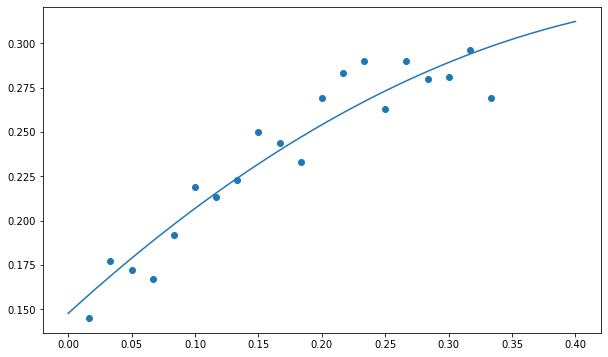

In [13]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 1, 10000, X2, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X2, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 1, 10000, Y2, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y2, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 1, 10000, Z2, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z2, T)

X2_polynomial_coefficients = (a1, b1, c1)
Y2_polynomial_coefficients = (a2, b2, c2)
Z2_polynomial_coefficients = (a3, b3, c3)

## Avaliando a Learning Rate
Vamos dividir a avaliação da Learning Rate em duas partes: avaliação pelos gráficos e pelo algoritmo _adjusted R²_ - o qual também ajudará na avaliação da complexidade do modelo.

### Variando a Learning Rate para um valor maior
Ao variar a Learning Rate para um valor maior do que o escolhido anteriormente, temos que o algoritmo _Gradient Descendant_ diverge e não consegue encontrar um ponto de mínimo, portanto, numa análise visual, as funções encontradas não conseguem descrever o modelo.

3.4735054973877596e+259 1.967077417704877e+260


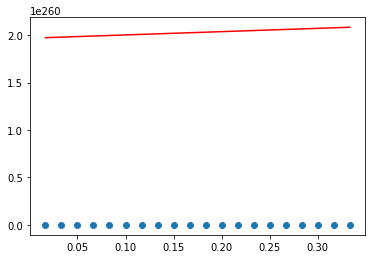

-7.454975581959761e+259 -4.221819751787567e+260


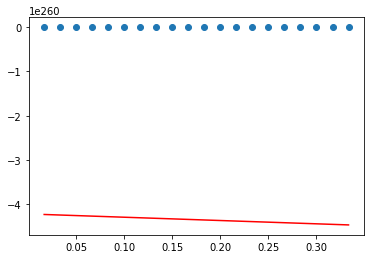

-5.669938155801945e+258 -3.210936995622716e+259


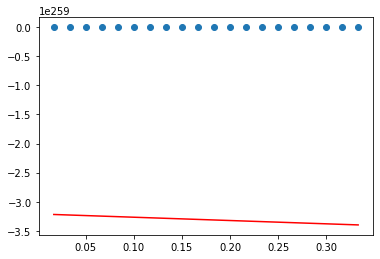

In [14]:
a1, b1 = gradientDescendantG1(0, 0, 2, 10000, X1, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X1, T)

a2, b2 = gradientDescendantG1(0, 0, 2, 10000, Y1, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y1, T)

a3, b3 = gradientDescendantG1(0, 0, 2, 10000, Z1, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z1, T)

X1_linear_coefficients.append((a1, b1))
Y1_linear_coefficients.append((a2, b2))
Z1_linear_coefficients.append((a3, b3))

1.7892682175851185e+272 7.814295751769176e+272 4.422168310759867e+273


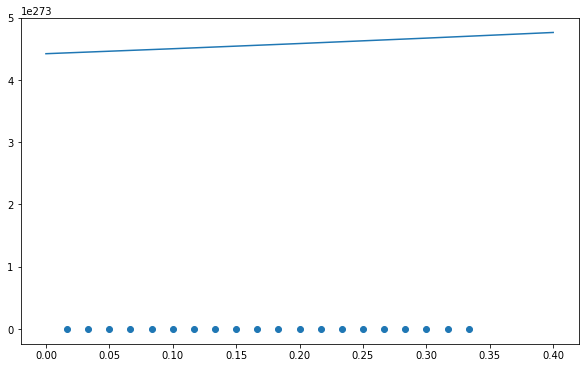

-3.8373548450544256e+272 -1.6758932712844159e+273 -9.484005151470959e+273


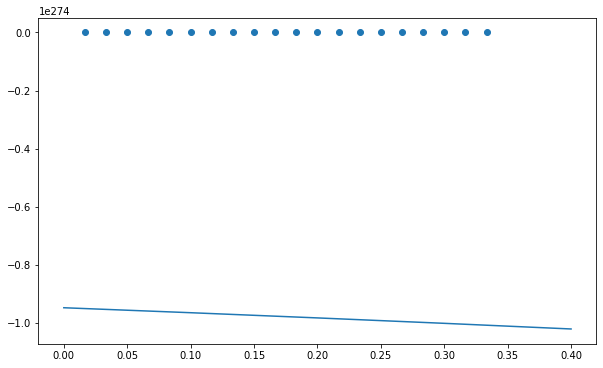

-2.919159471866554e+271 -1.2748885402173278e+272 -7.214689437654799e+272


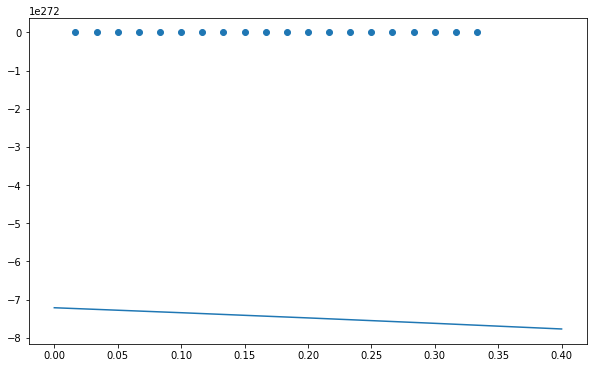

In [15]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 2, 10000, X1, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X1, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 2, 10000, Y1, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y1, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 2, 10000, Z1, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z1, T)

X1_polynomial_coefficients.append((a1, b1, c1))
Y1_polynomial_coefficients.append((a2, b2, c2))
Z1_polynomial_coefficients.append((a3, b3, c3))

### Variando a Learning Rate para um valor menor
Ao variar a Learning Rate para um valor menor do que o escolhido anteriormente, em uma análise visual, temos que as funções encontradas não parecem descrever o modelo tão bem quanto na primeira learning rate escolhida. Obteríamos resultado melhores com essa learning rate aumentando o número de épocas usadas no _Gradiente Descendant_, o que, porém, aumenta o tempo de processamento da função consideravelmente.

-1.810859816706004 -0.4126388375507974


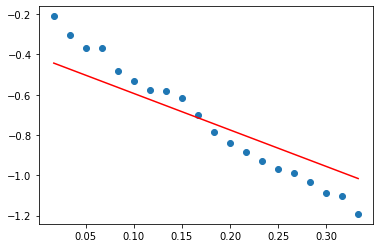

-1.6613398016465522 1.8652777093043855


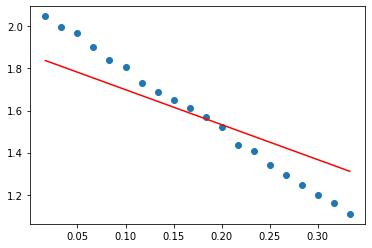

-0.009156146152790097 0.1211699920308749


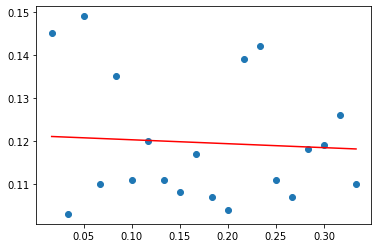

In [16]:
a1, b1 = gradientDescendantG1(0, 0, 0.01, 10000, X1, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X1, T)

a2, b2 = gradientDescendantG1(0, 0, 0.01, 10000, Y1, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y1, T)

a3, b3 = gradientDescendantG1(0, 0, 0.01, 10000, Z1, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z1, T)

X1_linear_coefficients.append((a1, b1))
Y1_linear_coefficients.append((a2, b2))
Z1_linear_coefficients.append((a3, b3))

-0.5819262055512998 -1.7273743483911597 -0.4039869302956792


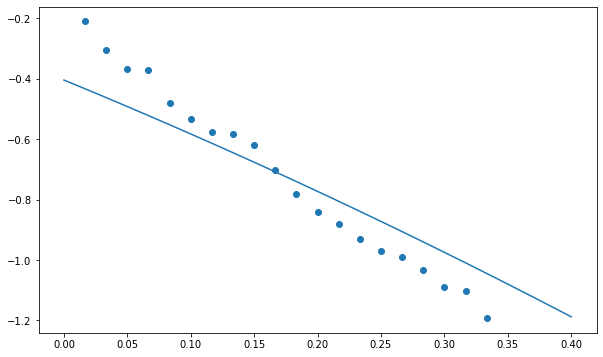

-0.5914930822196385 -1.5829126395645614 1.8751849898015944


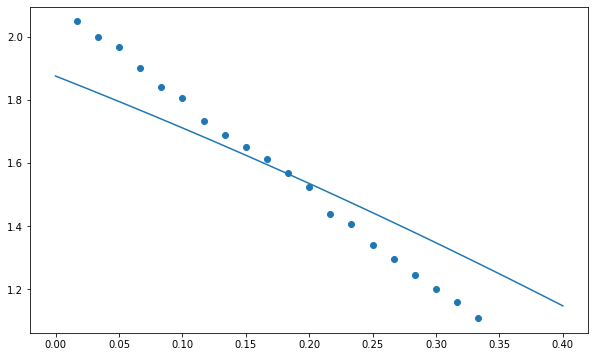

-0.0031677567586449996 -0.008999451553073837 0.12126892297044585


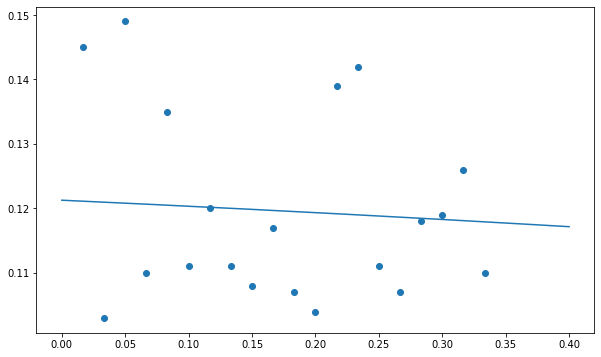

In [17]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 0.01, 10000, X1, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X1, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 0.01, 10000, Y1, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y1, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 0.01, 10000, Z1, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z1, T)

X1_polynomial_coefficients.append((a1, b1, c1))
Y1_polynomial_coefficients.append((a2, b2, c2))
Z1_polynomial_coefficients.append((a3, b3, c3))

### Métricas, escolha de modelos e previsão

Agora vamos analisar, dentre os modelos treinados acima, quais explicam melhor o chute 1. Para isso, vamos usar as métricas **R²** e **adjusted R²**. A primeira permite uma comparação objetiva entre quanto cada modelo representa os dados, onde 1 indica uma representação totalmente precisa e -1 indica o inverso. Já a segunda adiciona uma penalização conforme o grau do modelo utilizado de forma a prevenir *overfitting*.

In [18]:
def r_squared(y_expected, y_prediction):
    avg = np.average(y_expected)
    difference_from_average = y_expected - avg
    difference_from_prediction = y_expected - y_prediction
    total_sum = np.sum(difference_from_average ** 2)
    residual_sum = np.sum(difference_from_prediction ** 2)
    return (1 - (residual_sum / total_sum))

def adjusted_r_squared(y_expected, y_prediction, degree):
    r2 = r_squared(y_expected, y_prediction)
    n = y_expected.size
    return 1 - ((1 - r2)*(n - 1))/(n - degree - 1)

X1_r_squared = []
X1_adjusted_r_squared = []
Y1_r_squared = []
Y1_adjusted_r_squared = []
Z1_r_squared = []
Z1_adjusted_r_squared = []

for i in range(3):
    a, b = X1_linear_coefficients[i]
    X1_values = a*T + b
    X1_r_squared.append(r_squared(X1, X1_values))
    X1_adjusted_r_squared.append(adjusted_r_squared(X1, X1_values, 1))
    a, b = Y1_linear_coefficients[i]
    Y1_values = a*T + b
    Y1_r_squared.append(r_squared(Y1, Y1_values))
    Y1_adjusted_r_squared.append(adjusted_r_squared(Y1, Y1_values, 1))
    a, b = Z1_linear_coefficients[i]
    Z1_values = a*T + b
    Z1_r_squared.append(r_squared(Z1, Z1_values))
    Z1_adjusted_r_squared.append(adjusted_r_squared(Z1, Z1_values, 1))

for i in range(3):
    a, b, c = X1_polynomial_coefficients[i]
    X1_values = c + (b*T) + (a*(T**2))
    X1_r_squared.append(r_squared(X1, X1_values))
    X1_adjusted_r_squared.append(adjusted_r_squared(X1, X1_values, 1))
    a, b, c = Y1_polynomial_coefficients[i]
    Y1_values = c + (b*T) + (a*(T**2))
    Y1_r_squared.append(r_squared(Y1, Y1_values))
    Y1_adjusted_r_squared.append(adjusted_r_squared(Y1, Y1_values, 1))
    a, b, c = Z1_polynomial_coefficients[i]
    Z1_values = c + (b*T) + (a*(T**2))
    Z1_r_squared.append(r_squared(Z1, Z1_values))
    Z1_adjusted_r_squared.append(adjusted_r_squared(Z1, Z1_values, 1))

max_X1_r_squared = max(X1_r_squared)
max_X1_r_squared_index = X1_r_squared.index(max_X1_r_squared)
max_X1_adjusted_r_squared = max(X1_adjusted_r_squared)
max_X1_adjusted_r_squared_index = X1_adjusted_r_squared.index(max_X1_adjusted_r_squared)

print("Melhor R² para X1:", max_X1_r_squared, "índice:", max_X1_r_squared_index)
print("Melhor adjusted R² para X1:", max_X1_adjusted_r_squared, "índice:", max_X1_adjusted_r_squared_index)

max_Y1_r_squared = max(Y1_r_squared)
max_Y1_r_squared_index = Y1_r_squared.index(max_Y1_r_squared)
max_Y1_adjusted_r_squared = max(Y1_adjusted_r_squared)
max_Y1_adjusted_r_squared_index = Y1_adjusted_r_squared.index(max_Y1_adjusted_r_squared)

print("Melhor R² para Y1:", max_Y1_r_squared, "índice:", max_Y1_r_squared_index)
print("Melhor adjusted R² para Y1:", max_Y1_adjusted_r_squared, "índice:", max_Y1_adjusted_r_squared_index)

max_Z1_r_squared = max(Z1_r_squared)
max_Z1_r_squared_index = Z1_r_squared.index(max_Z1_r_squared)
max_Z1_adjusted_r_squared = max(Z1_adjusted_r_squared)
max_Z1_adjusted_r_squared_index = Z1_adjusted_r_squared.index(max_Z1_adjusted_r_squared)

print("Melhor R² para Z1:", max_Z1_r_squared, "índice:", max_Z1_r_squared_index)
print("Melhor adjusted R² para Z1:", max_Z1_adjusted_r_squared, "índice:", max_Z1_adjusted_r_squared_index)

Melhor R² para X1: 0.9919945970414474 índice: 3
Melhor adjusted R² para X1: 0.9915498524326389 índice: 3
Melhor R² para Y1: 0.998614680322442 índice: 0
Melhor adjusted R² para Y1: 0.9985377181181333 índice: 0
Melhor R² para Z1: 0.07286385730304534 índice: 3
Melhor adjusted R² para Z1: 0.021356293819881245 índice: 3


<ipython-input-18-2545cbb00f7d>:6: RuntimeWarning: overflow encountered in square
  residual_sum = np.sum(difference_from_prediction ** 2)


A partir dos dados acima, podemos concluir que os melhores modelos para cada variável são os modelos treinados com o **learning rate** original e, para X1 e Z1, o modelo quadrático e, para Y1, o modelo linear. Como a diferença entre os graus dos modelos é muito pequena, isso não teve uma influência tão relevante no **adjusted R²**, mantendo os mesmos modelos com o melhor *score*. Utilizamos esses modelos para prever se o chute 1 será ou não um gol.

### Previsão de gol para o chute 1
Com os melhores coeficientes encontrados, queremos prever se o chute 1 irá em direção ao gol e, caso sim, se conseguiremos defender.

Definimos as seguintes dimensões para o gol:
- X: 1m
- Z: 0.1m

Encontrando o tempo quando y=0 (que indica que chegou ao gol no eixo y), conseguimos encontrar as variáveis x e z e dizer se será gol ou não.

X: 1m
Z: 0.1m
Encontrando o tempo quando y=0 (que indica que chegou ao gol no eixo y), conseguimos encontrar as variáveis x e z e dizer se será gol ou não.

In [25]:
a2, b2 = Y1_linear_coefficients[0]
t = - b2/a2 # considerando que queremos o tempo quando Y = 0

a1, b1, c1 = X1_polynomial_coefficients[0]
x = a1*(t**2) + b1*t + c1

a3, b3, c3 = Z1_polynomial_coefficients[0]
z = a3*(t**2) + b3*t + c3

print("X:", x, "m;   Z:", z, "m")

X: -2.219958383044314 m;   Z: 0.14877554552240219 m


Como conclusão, temos que o chute passou longe do gol, já que não está dentro dos intervalos definidos.

Agora, fazemos o mesmo para o chute 2. Como não variamos o **learning rate** no chute 2, temos apenas dois modelos: linear e polinomial.

In [19]:
X2_r_squared = []
X2_adjusted_r_squared = []
Y2_r_squared = []
Y2_adjusted_r_squared = []
Z2_r_squared = []
Z2_adjusted_r_squared = []

a, b = X2_linear_coefficients
X2_values = a*T + b
X2_r_squared.append(r_squared(X2, X2_values))
X2_adjusted_r_squared.append(adjusted_r_squared(X2, X2_values, 1))
a, b = Y2_linear_coefficients
Y2_values = a*T + b
Y2_r_squared.append(r_squared(Y2, Y2_values))
Y2_adjusted_r_squared.append(adjusted_r_squared(Y2, Y2_values, 1))
a, b = Z2_linear_coefficients
Z2_values = a*T + b
Z2_r_squared.append(r_squared(Z2, Z2_values))
Z2_adjusted_r_squared.append(adjusted_r_squared(Z2, Z2_values, 1))

a, b, c = X2_polynomial_coefficients
X2_values = c + (b*T) + (a*(T**2))
X2_r_squared.append(r_squared(X2, X2_values))
X2_adjusted_r_squared.append(adjusted_r_squared(X2, X2_values, 1))
a, b, c = Y2_polynomial_coefficients
Y2_values = c + (b*T) + (a*(T**2))
Y2_r_squared.append(r_squared(Y2, Y2_values))
Y2_adjusted_r_squared.append(adjusted_r_squared(Y2, Y2_values, 1))
a, b, c = Z2_polynomial_coefficients
Z2_values = c + (b*T) + (a*(T**2))
Z2_r_squared.append(r_squared(Z2, Z2_values))
Z2_adjusted_r_squared.append(adjusted_r_squared(Z2, Z2_values, 1))

max_X2_r_squared = max(X2_r_squared)
max_X2_r_squared_index = X2_r_squared.index(max_X2_r_squared)
max_X2_adjusted_r_squared = max(X2_adjusted_r_squared)
max_X2_adjusted_r_squared_index = X2_adjusted_r_squared.index(max_X2_adjusted_r_squared)

print("Melhor R² para X2:", max_X2_r_squared, "índice:", max_X2_r_squared_index)
print("Melhor adjusted R² para X2:", max_X2_adjusted_r_squared, "índice:", max_X2_adjusted_r_squared_index)

max_Y2_r_squared = max(Y2_r_squared)
max_Y2_r_squared_index = Y2_r_squared.index(max_Y2_r_squared)
max_Y2_adjusted_r_squared = max(Y2_adjusted_r_squared)
max_Y2_adjusted_r_squared_index = Y2_adjusted_r_squared.index(max_Y2_adjusted_r_squared)

print("Melhor R² para Y2:", max_Y2_r_squared, "índice:", max_Y2_r_squared_index)
print("Melhor adjusted R² para Y2:", max_Y2_adjusted_r_squared, "índice:", max_Y2_adjusted_r_squared_index)

max_Z2_r_squared = max(Z2_r_squared)
max_Z2_r_squared_index = Z2_r_squared.index(max_Z2_r_squared)
max_Z2_adjusted_r_squared = max(Z2_adjusted_r_squared)
max_Z2_adjusted_r_squared_index = Z2_adjusted_r_squared.index(max_Z2_adjusted_r_squared)

print("Melhor R² para Z2:", max_Z2_r_squared, "índice:", max_Z2_r_squared_index)
print("Melhor adjusted R² para Z2:", max_Z2_adjusted_r_squared, "índice:", max_Z2_adjusted_r_squared_index)

Melhor R² para X2: 0.9884465552948856 índice: 1
Melhor adjusted R² para X2: 0.9878046972557125 índice: 1
Melhor R² para Y2: 0.998614680322442 índice: 0
Melhor adjusted R² para Y2: 0.9985377181181333 índice: 0
Melhor R² para Z2: 0.9077772805183272 índice: 1
Melhor adjusted R² para Z2: 0.9026537961026787 índice: 1


Assim como o resultado para o chute 1, os melhores modelos são os polinomiais para X2 e Z2 e o linear para Y2. Podemos notar que, em comparação com o chute 1, o **R²** do eixo Z do chute 2 foi consideravelmente maior. Podemos atribuir isso ao formato dos dados. No chute 2, percebemos um comportamento mais parecido com uma parábola, o que condiz com nosso modelo quadrático. Utilizamos os modelos selecionados para prever se o chute 2 será ou não um gol.

# Parte 2 - Classificação de Algarismos

Nesta parte, comparamos o desempenho de diferentes algoritmos de classificação supervisionada na tarefa de identificar algarismos a partir de imagens 8x8. Para isso usamos as imagens disponíveis no Pen-Based
Recognition of Handwritten Digits Data Set e acessíveis pelo sklearn através da função load_digits. Os dados estão disponíveis em forma de imagem em digits.image ou em forma de vetor em digits.data e a classe de cada dado pode ser encontrada em digits.target.

Abaixo, demonstramos os 10 primeiros algarismos do conjunto de dados em forma de imagem:

0


<Figure size 432x288 with 0 Axes>

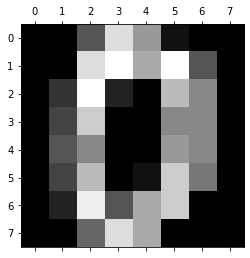

1


<Figure size 432x288 with 0 Axes>

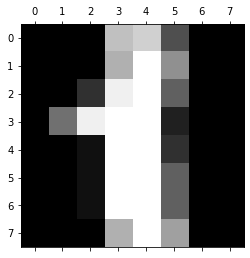

2


<Figure size 432x288 with 0 Axes>

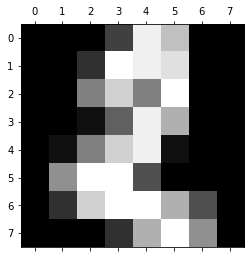

3


<Figure size 432x288 with 0 Axes>

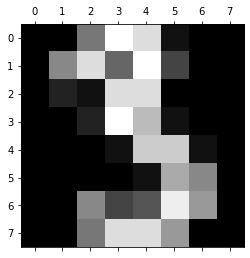

4


<Figure size 432x288 with 0 Axes>

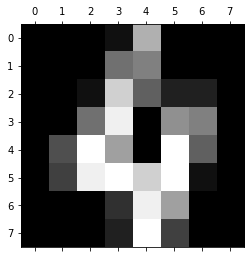

5


<Figure size 432x288 with 0 Axes>

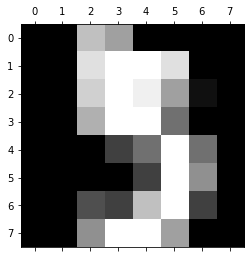

6


<Figure size 432x288 with 0 Axes>

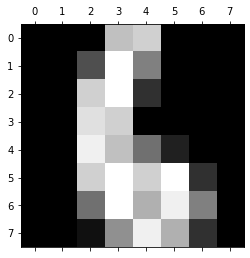

7


<Figure size 432x288 with 0 Axes>

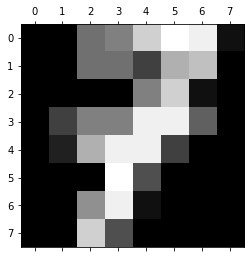

8


<Figure size 432x288 with 0 Axes>

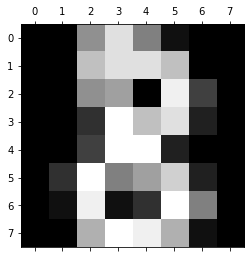

9


<Figure size 432x288 with 0 Axes>

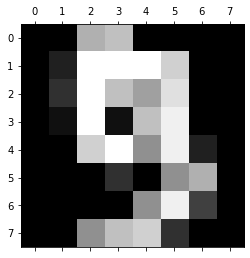

In [18]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
for i in range(10):
    print(digits.target[i])
    plt.gray() 
    plt.matshow(digits.images[i]) 
    plt.show() 

Em seguida, separamos os dados em conjuntos de treinamento (90%) e de teste (10%):

In [19]:
from sklearn.model_selection import train_test_split

digits_data_train_and_val, digits_data_test, digits_target_train_and_val, digits_target_test = \
        train_test_split(digits.data, digits.target, test_size=0.1, random_state=42)

print("Dados para treino:", digits_data_train_and_val.shape[0])
print("Dados para teste:", digits_data_test.shape[0])

Dados para treino: 1617
Dados para teste: 180


Como cada dado possui 64 *features*, fizemos a **estandardização** dos dados e usamos o algoritmo **LDA** para diminuir sua dimensão de forma a aumentar sua densidade. Dessa forma, facilitando o treinamento de algoritmos de classificação.

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
reduced_digits_data_train_and_val = lda.fit_transform(digits_data_train_and_val, digits_target_train_and_val)
reduced_digits_data_test = lda.transform(digits_data_test)
print("A dimensionalidade dos dados foi reduzida de %d para %d." \
      % (digits.data.shape[1], reduced_digits_data_train_and_val.shape[1]))

A dimensionalidade dos dados foi reduzida de 64 para 9.


Para visualizar os dados, utilizamos o algoritmo **t-SNE**. Ele foi criado com o propósito de reduzir a dimensionalidade de um conjunto de dados para sua visualização.

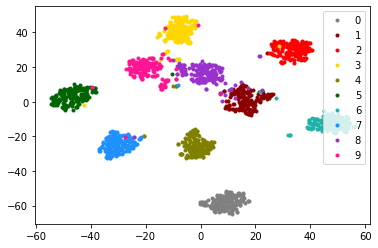

In [21]:
from sklearn.manifold import TSNE
import numpy as np

viz_digits_data_train_and_val = TSNE(n_components=2, random_state=42).fit_transform(reduced_digits_data_train_and_val)

colors = ['gray', 'darkred', 'red', 'gold', 'olive', 'darkgreen', 'lightseagreen', 'dodgerblue', 'darkorchid', 'deeppink']
for i in range(10):
    indices = np.where(digits_target_train_and_val == i)
    selected_data = np.take(viz_digits_data_train_and_val, indices, 0)
    plt.plot(selected_data[0,:,0], selected_data[0,:,1], '.', color=colors[i], label=i)
plt.legend()
plt.show()

Em seguida, separamos os dados entre treino e validação e usamos dois métodos de classificação: **KNN** e **árvores de decisões**. Para cada método, variamos alguns de seus parâmetros de entrada para podermos em seguida comparar a eficácia do treino e escolher o modelo que melhor representa os dados.

In [22]:
digits_data_train, digits_data_val, digits_target_train, digits_target_val = \
        train_test_split(reduced_digits_data_train_and_val, digits_target_train_and_val, test_size=0.1, \
                         random_state=42)

print("Dados para treino:", digits_data_train.shape[0])
print("Dados para validação:", digits_data_val.shape[0])

Dados para treino: 1455
Dados para validação: 162


Para as **árvores de decisões**, variamos a profundidade máxima da árvore. Quanto menor a profundidade, menos especializado o modelo é para o conjunto de dados fornecidos. Também adicionamos uma árvore treinada sem altura máxima, que será treinada até que o modelo seja capaz de classificar todos os dados do conjunto de treino com precisão absoluta.

In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifiers = []

clf = DecisionTreeClassifier(random_state=42)
clf.fit(digits_data_train, digits_target_train)
print("Profundidade da árvore sem limite:", clf.get_depth())
decision_tree_classifiers.append(clf)

for i in range(1, 16):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(digits_data_train, digits_target_train)
    decision_tree_classifiers.append(clf)

Profundidade da árvore sem limite: 16


Para o algoritmo **KNN**, variamos o número de vizinhos usados para a classificação e a forma como as distâncias entre os pontos são ponderadas. O modo *uniform* utiliza o mesmo peso para todos os pontos. Já o modo *distance* aumenta o peso de vizinhos mais próximos.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifiers_uniform_weight = []
for i in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    clf.fit(digits_data_train, digits_target_train)
    knn_classifiers_uniform_weight.append(clf)

knn_classifiers_distance_weight = []
for i in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf.fit(digits_data_train, digits_target_train)
    knn_classifiers_distance_weight.append(clf)

Agora avaliamos, dentre os modelos treinados acima, quais apresentam melhor desempenho no conjunto de dados separados para validação. Para fazer essa medição, utilizamos o **F1 Score**, que consiste em uma média harmônica da precisão e do recall.

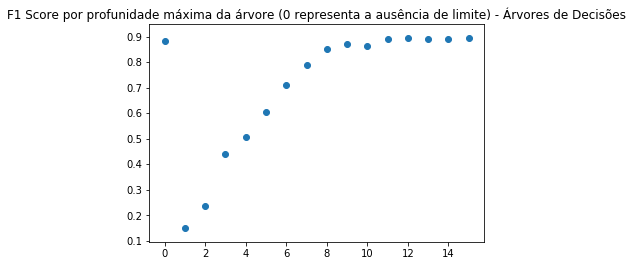

Score mínimo: 0.14814814814814814 profundidade: 1
Score máximo: 0.8950617283950617 profundidade: 12


In [25]:
from sklearn.metrics import f1_score

score_decision_tree = []
for clf in decision_tree_classifiers:
    prediction = clf.predict(digits_data_val)
    score_decision_tree.append(f1_score(digits_target_val, prediction, average='micro'))

plt.title("F1 Score por profunidade máxima da árvore (0 representa a ausência de limite) - Árvores de Decisões")
plt.scatter(list(range(16)), score_decision_tree)
plt.show()

min_value = min(score_decision_tree)
min_index = score_decision_tree.index(min_value)

max_value = max(score_decision_tree)
max_index = score_decision_tree.index(max_value)

best_decision_tree = decision_tree_classifiers[max_index]
best_decision_tree_score_val = max_value

print("Score mínimo:", min_value, "profundidade:", min_index)
print("Score máximo:", max_value, "profundidade:", max_index)

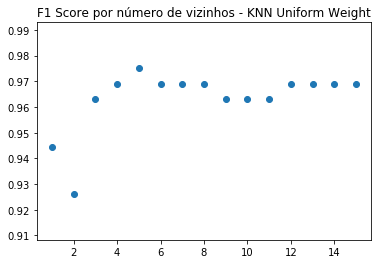

Score mínimo: 0.9259259259259259 vizinhos: 2
Score máximo: 0.9753086419753086 vizinhos: 5


In [26]:
score_knn_uniform_weight = []

for clf in knn_classifiers_uniform_weight:
    prediction = clf.predict(digits_data_val)
    score_knn_uniform_weight.append(f1_score(digits_target_val, prediction, average='micro'))
    
plt.title("F1 Score por número de vizinhos - KNN Uniform Weight")
plt.scatter(list(range(1, 16)), score_knn_uniform_weight)
plt.show()

min_value = min(score_knn_uniform_weight)
min_index = score_knn_uniform_weight.index(min_value)

max_value = max(score_knn_uniform_weight)
max_index = score_knn_uniform_weight.index(max_value)

best_knn_uniform_weight = knn_classifiers_uniform_weight[max_index]
best_knn_uniform_weight_score_val = max_value

print("Score mínimo:", min_value, "vizinhos:", min_index + 1)
print("Score máximo:", max_value, "vizinhos:", max_index + 1)

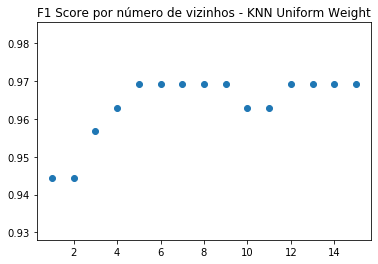

Score mínimo: 0.9444444444444444 vizinhos: 1
Score máximo: 0.9691358024691359 vizinhos: 5


In [27]:
score_knn_distance_weight = []

for clf in knn_classifiers_distance_weight:
    prediction = clf.predict(digits_data_val)
    score_knn_distance_weight.append(f1_score(digits_target_val, prediction, average='micro'))
    
plt.title("F1 Score por número de vizinhos - KNN Uniform Weight")
plt.scatter(list(range(1, 16)), score_knn_distance_weight)
plt.show()

min_value = min(score_knn_distance_weight)
min_index = score_knn_distance_weight.index(min_value)

max_value = max(score_knn_distance_weight)
max_index = score_knn_distance_weight.index(max_value)

best_knn_distance_weight = knn_classifiers_distance_weight[max_index]
best_knn_distance_weight_score_val = max_value

print("Score mínimo:", min_value, "vizinhos:", min_index + 1)
print("Score máximo:", max_value, "vizinhos:", max_index + 1)

Agora que selecionamos três modelos treinados para classificar as imagens, vamos avaliar sua eficácia no conjunto de testes. Para isso, usamos novamente o **F1 score** para permitir a comparação com a eficácia no conjunto de validação. Além disso, plotamos a **matriz de confusão**, que permite uma análise mais detalhada por separar a eficácia para cada algarismo.

F1 Score da árvore de decisão no conjunto de validação: 0.8950617283950617
F1 Score da árvore de decisão no conjunto de testes: 0.9166666666666666


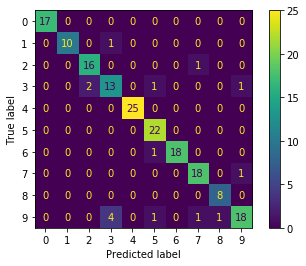

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

prediction_decision_tree = best_decision_tree.predict(reduced_digits_data_test)
best_decision_tree_score_test = f1_score(digits_target_test, prediction_decision_tree, average='micro')

print("F1 Score da árvore de decisão no conjunto de validação:", best_decision_tree_score_val)
print("F1 Score da árvore de decisão no conjunto de testes:", best_decision_tree_score_test)

cm = confusion_matrix(digits_target_test, prediction_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

F1 Score do KNN com peso uniforme no conjunto de validação: 0.9753086419753086
F1 Score do KNN com peso uniforme no conjunto de testes: 0.9722222222222222


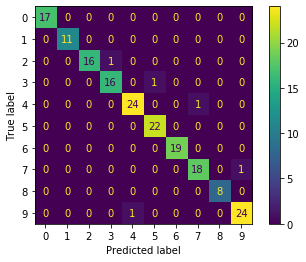

In [29]:
prediction_knn_uniform_weight = best_knn_uniform_weight.predict(reduced_digits_data_test)
best_knn_uniform_weight_score_test = f1_score(digits_target_test, prediction_knn_uniform_weight, average='micro')

print("F1 Score do KNN com peso uniforme no conjunto de validação:", best_knn_uniform_weight_score_val)
print("F1 Score do KNN com peso uniforme no conjunto de testes:", best_knn_uniform_weight_score_test)

cm = confusion_matrix(digits_target_test, prediction_knn_uniform_weight)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

F1 Score do KNN ponderado pela distância no conjunto de validação: 0.9691358024691359
F1 Score do KNN ponderado pela distância no conjunto de testes: 0.9722222222222222


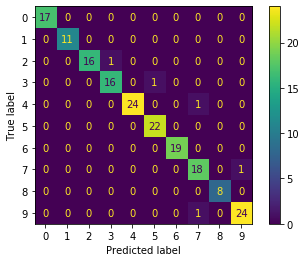

In [30]:
prediction_knn_distance_weight = best_knn_distance_weight.predict(reduced_digits_data_test)
best_knn_distance_weight_score_test = f1_score(digits_target_test, prediction_knn_distance_weight, average='micro')

print("F1 Score do KNN ponderado pela distância no conjunto de validação:", best_knn_distance_weight_score_val)
print("F1 Score do KNN ponderado pela distância no conjunto de testes:", best_knn_distance_weight_score_test)

cm = confusion_matrix(digits_target_test, prediction_knn_distance_weight)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Como podemos observar, o algoritmo **KNN** foi mais eficiente em classificar os números que a **árvore de decisões**. Dentro do **KNN**, a separação entre a estratégia não-ponderada e a ponderada pelas distâncias resultou não ser muito relevante. Analisando a matriz de confusão de ambas estratégias, podemos detectar apenas uma diferença na linha 9 e, em ambos os casos, o algarismo foi identificado incorretamente.

Como o método **KNN** utiliza a distância para determinar a qual classe um dado pertence, podemos assumir que a utilização do algoritmo **LDA** (que tenta aumentar a distância entre dados de classes diferentes e diminuir a distância entre dados de uma mesma classe) no pré-processamento contribuiu para uma maior eficácia deste método.